In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
lam0 = 1

n1,n2 = 2,1 #core,cladding refractive indices
a = 3*lam0 #core thickness

b = 5*lam0 #cladding thickness
NRES = 10
dx = lam0/NRES

M = 5 #number of modes to calculate

Sx = a + 2*b
Nx = int(np.ceil(Sx/dx))
Sx = Nx*dx

xa = np.arange(0,Nx)*dx
xa = xa - np.mean(xa)

#start and stop indices
nx = int(np.round(a/dx))
nx1 = int(np.round((Nx-nx)/2))
nx2 = nx1 + nx - 1

#build N
N1 = np.zeros((Nx,1))
N1[0:nx1] = n2
N1[nx1:nx2] = n1
N1[nx2:Nx] = n2

#calculate k0
k0 = 2*np.pi/lam0

#build dx2
DX2 = np.zeros((Nx,Nx))
np.fill_diagonal(DX2,-2)
DX2 += np.diag(np.ones(Nx-1)*1,k=1)+np.diag(np.ones(Nx-1)*1,k=-1)
DX2 = DX2/(k0*dx)**2
DX2

array([[-5.06605918,  2.53302959,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.53302959, -5.06605918,  2.53302959, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  2.53302959, -5.06605918, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -5.06605918,
         2.53302959,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.53302959,
        -5.06605918,  2.53302959],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.53302959, -5.06605918]])

In [76]:
N = np.diag(N1.T[0])
N

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [77]:
#Solve eigen value problem
A = DX2 + N**2
D,V = np.linalg.eig(A)
NEFF = np.sqrt(D+0j)

In [78]:
#isolate real values
ind = np.flip(np.argsort(np.real(NEFF)))
NEFF_sort = NEFF[ind]
V_sort = V[:,ind]

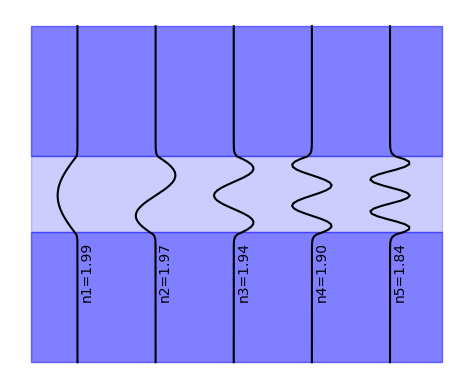

In [122]:
for i in range(M):
    plt.plot(3*(V_sort[:,i]+i),xa,'-k')
    plt.text(3*i+0.1,-4,f"n{i+1}={np.real(NEFF_sort[i]):.2f}",rotation=90)
plt.gca().fill_between([-1.8,14],xa[-1]-nx1*dx,xa[-1],color='blue',alpha=0.5)
plt.gca().fill_between([-1.8,14],xa[0],xa[0]+nx1*dx,color='blue',alpha=0.5)
plt.gca().fill_between([-1.8,14],xa[-1]-nx1*dx,xa[0]+nx1*dx,color='blue',alpha=0.2)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

In [82]:
xa[-1]-nx1*dx

1.4500000000000002